# Dados Maranhão COVID-19 (Dados referentes ao ano de 2020)

## Foram utilizados a base de dados abertos da Secretaria de Saúde do Estado do Maranhão para gerar algumas análises referentes ao número de novos casos, novas mortes, mortes mensais, além de alguns gráficos representativos

In [34]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import numpy as np

### Leitura dos dois arquivos .CSV baixados diretamente do site do painel covid BR, do SUS.
### https://covid.saude.gov.br

In [35]:
#df1 = pd.read_csv('2020.csv')

df1 = pd.read_csv('files_from_data/PAINEL_COVIDBR_2020_Parte1.csv', sep = ';')
df2 = pd.read_csv('files_from_data/PAINEL_COVIDBR_2020_Parte2.csv', sep = ';')

### Casos Somente no Estado do Maranhão

In [36]:
dfMA1 = df1.loc[df1['estado'] == 'MA']

dfMA1

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1264,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-25,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1265,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-26,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1266,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-27,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1267,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-28,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1268,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-29,9,7075181.0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
89636,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-07-27,31,51714.0,2799,12,35,0,NaN,NaN,0.0
89637,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-07-28,31,51714.0,2797,-2,35,0,NaN,NaN,0.0
89638,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-07-29,31,51714.0,2833,36,35,0,NaN,NaN,0.0
89639,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-07-30,31,51714.0,2841,8,35,0,NaN,NaN,0.0


In [37]:
dfMA2 = df2.loc[df2['estado'] == 'MA']

dfMA2

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1224,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-08-01,31,7075181.0,121581,920,3032,19,NaN,NaN,NaN
1225,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-08-02,32,7075181.0,121953,372,3050,18,NaN,NaN,NaN
1226,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-08-03,32,7075181.0,122482,529,3069,19,NaN,NaN,NaN
1227,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-08-04,32,7075181.0,123887,1405,3085,16,NaN,NaN,NaN
1228,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-08-05,32,7075181.0,125459,1572,3103,18,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106942,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-12-27,53,51714.0,3847,0,39,0,NaN,NaN,0.0
106943,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-12-28,53,51714.0,3847,0,39,0,NaN,NaN,0.0
106944,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-12-29,53,51714.0,3847,0,39,0,NaN,NaN,0.0
106945,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-12-30,53,51714.0,3847,0,39,0,NaN,NaN,0.0


In [38]:
dfMA = pd.concat([dfMA1, dfMA2], axis = 0)

dfMA

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1264,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-25,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1265,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-26,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1266,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-27,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1267,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-28,9,7075181.0,0,0,0,0,NaN,NaN,NaN
1268,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-02-29,9,7075181.0,0,0,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
106942,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-12-27,53,51714.0,3847,0,39,0,NaN,NaN,0.0
106943,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-12-28,53,51714.0,3847,0,39,0,NaN,NaN,0.0
106944,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-12-29,53,51714.0,3847,0,39,0,NaN,NaN,0.0
106945,Nordeste,MA,Zé Doca,21,211400.0,21019.0,ZE DOCA,2020-12-30,53,51714.0,3847,0,39,0,NaN,NaN,0.0


### Dias somente no Município de São Luís com mais de 15 óbitos

In [39]:
dfMA.loc[(dfMA['municipio'] == 'São Luís') & (dfMA['obitosNovos'] > 15)]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
85609,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-04-28,18,1101884.0,1977,83,116,18,NaN,NaN,1.0
85610,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-04-29,18,1101884.0,2149,172,136,20,NaN,NaN,1.0
85612,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-05-01,18,1101884.0,2671,239,165,16,NaN,NaN,1.0
85616,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-05-05,19,1101884.0,3088,125,213,16,NaN,NaN,1.0
85619,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-05-08,19,1101884.0,3745,214,255,17,NaN,NaN,1.0
85620,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-05-09,19,1101884.0,4008,263,271,16,NaN,NaN,1.0
85621,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-05-10,20,1101884.0,4274,266,289,18,NaN,NaN,1.0
85623,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-05-12,20,1101884.0,4780,164,324,21,NaN,NaN,1.0
85626,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-05-15,20,1101884.0,5375,335,363,17,NaN,NaN,1.0
85627,Nordeste,MA,São Luís,21,211130.0,21016.0,SAO LUIS,2020-05-16,20,1101884.0,5597,222,379,16,NaN,NaN,1.0


### Linha na qual tiveram mais óbitos

In [40]:
dfMA.loc[dfMA['obitosNovos'] == dfMA['obitosNovos'].max()]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1368,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-06-08,24,7075181.0,49371,1778,1247,77,NaN,NaN,NaN


### Data na qual tiveram mais óbitos

In [41]:
dfMA.loc[dfMA['obitosNovos'] == dfMA['obitosNovos'].max(), 'data']

1368    2020-06-08
Name: data, dtype: object

### Linha na qual tiveram mais casos

In [42]:
dfMA.loc[dfMA['casosNovos'] == dfMA['casosNovos'].max()]

,regiao,estado,municipio,coduf,codmun,codRegiaoSaude,nomeRegiaoSaude,data,semanaEpi,populacaoTCU2019,casosAcumulado,casosNovos,obitosAcumulado,obitosNovos,Recuperadosnovos,emAcompanhamentoNovos,interior/metropolitana
1391,Nordeste,MA,NaN,21,NaN,NaN,NaN,2020-07-01,27,7075181.0,83256,2805,2081,33,NaN,NaN,NaN


### Data em que tiveram mais casos

In [43]:
dfMA.loc[dfMA['casosNovos'] == dfMA['casosNovos'].max(), 'data']

1391    2020-07-01
Name: data, dtype: object

### Total de casos do estado do Maranhão

In [44]:
dfMA['casosNovos'].sum()

401876

### Total de óbitos

In [45]:
dfMA['obitosNovos'].sum()

9000

### Gráfico de mortes mensais

In [46]:
dfMA.data = dfMA.data.astype('string')

In [47]:
#dfMA['data'] = pd.to_datetime[dfMA['data']]
dfMA['data'] = dfMA['data'].astype('datetime64[ns]')

In [48]:
dfMA['month'] = dfMA['data'].dt.month

In [49]:
mortesMensais = []

for i in range (1,13,1):
    mortesMensais.append(
        dfMA.loc[(dfMA['month'] == i) & (dfMA['municipio'] == 'São Luís'), 'obitosNovos'].sum())
    
mortesMensais

[0, 0, 1, 148, 375, 301, 318, 62, 34, 15, 22, 23]

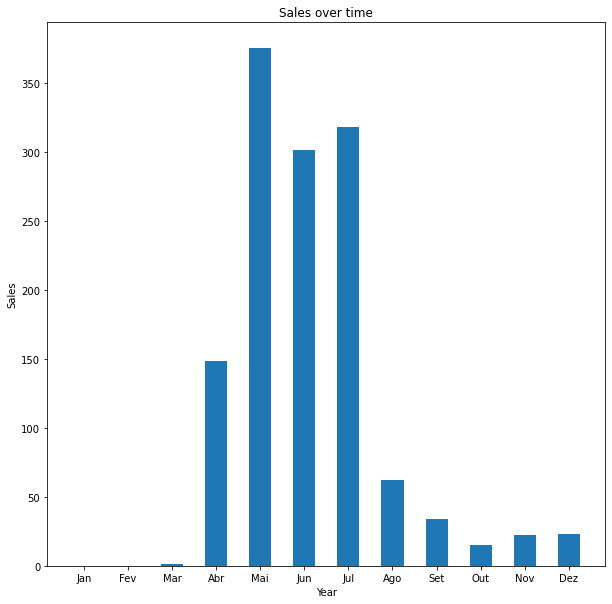

In [91]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

plt.bar(x = meses, height = mortesMensais, width=0.5)

plt.title('Sales over time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

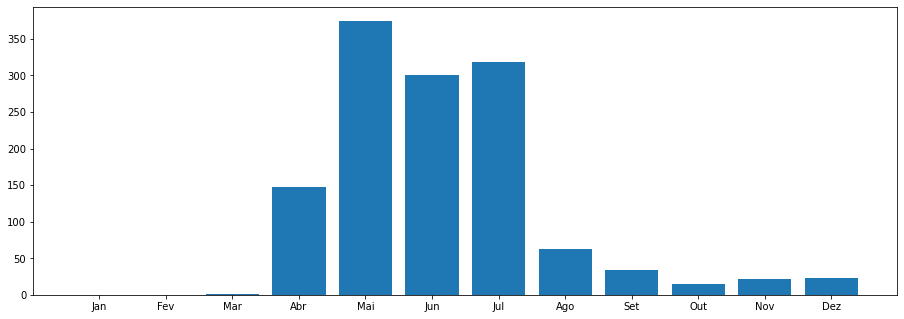

In [50]:
meses = ['Jan', 'Fev', 'Mar', 'Abr', 'Mai', 'Jun', 'Jul', 'Ago', 'Set', 'Out', 'Nov', 'Dez']

fig = plt.figure()

ax = fig.add_axes([0,1,2,1])
ax.bar(meses,mortesMensais)
plt.show()

### Gráfico de novos casos por região

In [65]:
dfTotal = pd.concat([df1, df2], axis = 0)

In [55]:
estados = ['AC',	'AL',	'AP',	'AM',	'BA',	'CE',	'DF',	'ES',	'GO',	'MA',	'MT',	
           'MS',	'MG',	'PA',	'PB',	'PR',	'PE',	'PI',	'RJ',	'RN',	'RS',	'RO',	
           'RR',	'SC',	'SP',	'SE',	'TO',]

In [66]:
casosPorEstado = {}

for i in range (1, 27, 1):
        casosPorEstado[estados[i]] = dfTotal.loc[(dfTotal['estado'] == estados[i]), 'casosNovos'].sum()
        
casosPorEstado

{'AL': 209636,
 'AP': 136402,
 'AM': 402026,
 'BA': 986800,
 'CE': 670182,
 'DF': 503402,
 'ES': 496464,
 'GO': 617736,
 'MA': 401876,
 'MT': 358854,
 'MS': 267522,
 'MG': 1085818,
 'PA': 587080,
 'PB': 332968,
 'PR': 833132,
 'PE': 444332,
 'PI': 285344,
 'RJ': 869296,
 'RN': 236166,
 'RS': 899348,
 'RO': 191458,
 'RR': 137378,
 'SC': 985166,
 'SP': 2924594,
 'SE': 225010,
 'TO': 180716}

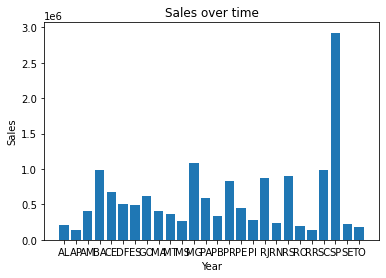

In [75]:
plt.bar(x = list(casosPorEstado.keys()), height = list(casosPorEstado.values()))
plt.title('Sales over time')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

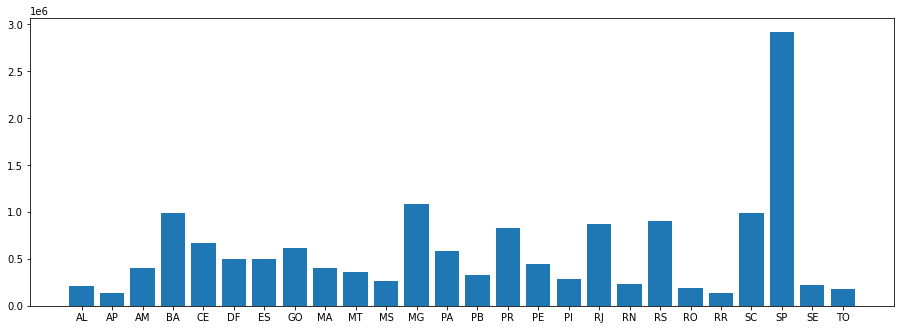

In [71]:
estados = list(casosPorEstado.keys())
valores = list(casosPorEstado.values())


fig = plt.figure()

ax = fig.add_axes([0,1,2,1])
ax.bar(estados,valores)
plt.show()